In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [103]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler


In [5]:
import ucimlrepo
from ucimlrepo import fetch_ucirepo

# fetch dataset
abalone = fetch_ucirepo(id=1)

# data (as pandas dataframes)
X = abalone.data.features
y = abalone.data.targets

# metadata
print(abalone.metadata)

# variable information
print(abalone.variables)



{'uci_id': 1, 'name': 'Abalone', 'repository_url': 'https://archive.ics.uci.edu/dataset/1/abalone', 'data_url': 'https://archive.ics.uci.edu/static/public/1/data.csv', 'abstract': 'Predict the age of abalone from physical measurements', 'area': 'Biology', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Tabular'], 'num_instances': 4177, 'num_features': 8, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': [], 'target_col': ['Rings'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1994, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C55C7W', 'creators': ['Warwick Nash', 'Tracy Sellers', 'Simon Talbot', 'Andrew Cawthorn', 'Wes Ford'], 'intro_paper': None, 'additional_info': {'summary': 'Predicting the age of abalone from physical measurements.  The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- 

In [91]:
numerical = ['Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight', 'Viscera_weight', 'Shell_weight']
catagorical = ['Sex']

In [8]:
data = pd.read_csv('abalone/abalone.data', names=['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight', 'Viscera_weight', 'Shell_weight', 'Rings'])
print(data.head())

  Sex  Length  Diameter  Height  Whole_weight  Shucked_weight  Viscera_weight  \
0   M   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   M   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   F   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   M   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   I   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   Shell_weight  Rings  
0         0.150     15  
1         0.070      7  
2         0.210      9  
3         0.155     10  
4         0.055      7  


In [10]:
# Map M and F
data['Sex'].value_counts()

Sex
M    1528
I    1342
F    1307
Name: count, dtype: int64

In [12]:
data['Sex'] = data['Sex'].map({'M': 0, 'F': 1, 'I': 2})
data['Sex'].value_counts()

Sex
0    1528
2    1342
1    1307
Name: count, dtype: int64

<Axes: >

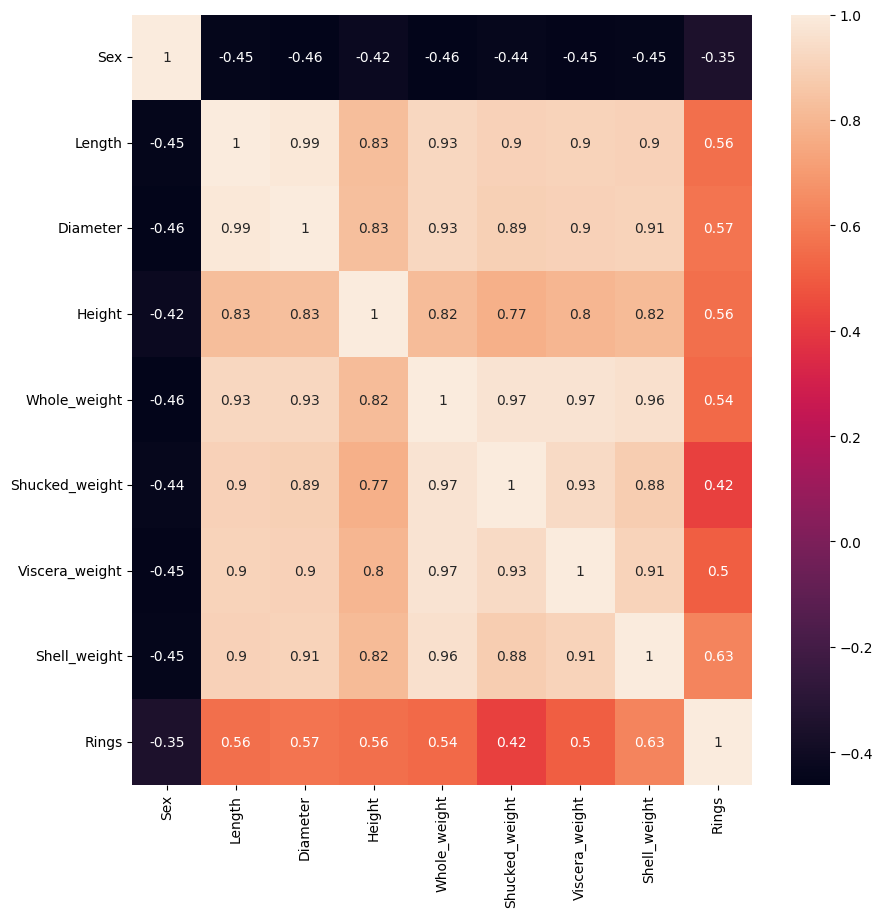

In [16]:
# Develop correlation matrix and showi it as a heatmap
corr = data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True)

In [35]:
# Pick the most correlated variables to rings
rings_corr = corr['Rings'].sort_values(ascending=False)
rings_pos, rings_neg = [rings_corr.index[1], rings_corr.values[1]], [rings_corr.index[-1], rings_corr.values[-1]]

In [36]:
print(rings_pos, rings_neg)

['Shell_weight', 0.6275740445103175] ['Sex', -0.3518215878725013]


<Axes: xlabel='Rings', ylabel='Shell_weight'>

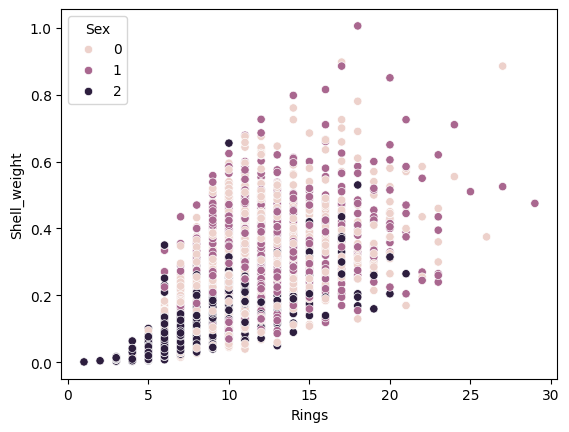

In [38]:
sns.scatterplot(data=data, x='Rings', y='Shell_weight', hue='Sex', legend=True)

Text(0.5, 1.0, 'Histogram of Sex')

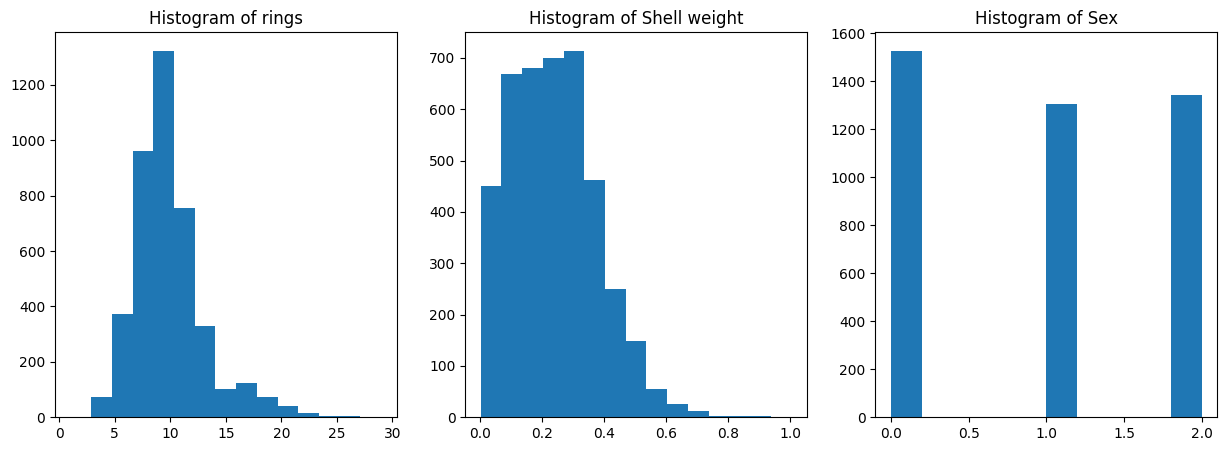

In [54]:
plt.subplots(1, 3, figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.hist(data['Rings'],bins=15)
plt.title('Histogram of rings')
plt.subplot(1, 3, 2)
plt.hist(data['Shell_weight'],bins=15)
plt.title('Histogram of Shell weight')
plt.subplot(1, 3, 3)
plt.hist(data['Sex'])
plt.title('Histogram of Sex')



In [57]:
test_size = 0.4

In [61]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [89]:
def linear_regression1(X, y):
    r2_scores = []
    mse_scores = []
    model = LinearRegression()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42, shuffle=True)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"MSE: {mse}, R2: {r2}")
    r2_scores.append(r2)
    mse_scores.append(mse)
    plt.figure()
    plt.plot(range(50), y_test[:50], color='red', label='Actual')
    plt.plot(range(50), y_pred[:50], color='blue', label='Predicted')
    plt.legend()
    plt.title('Linear Regression Compare for 50 test data')
    return r2_scores, mse_scores

MSE: 4.76714536253298, R2: 0.5182048268987611


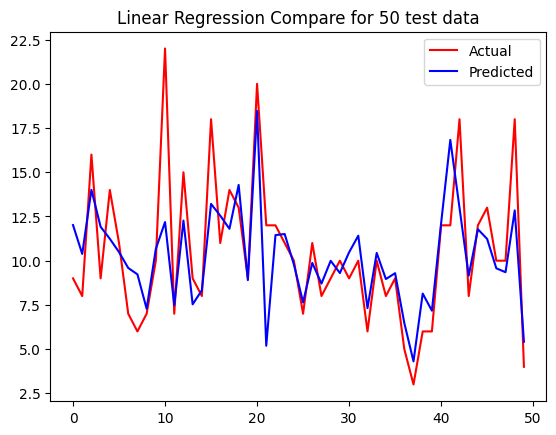

In [97]:
withoutnormlize_lr = linear_regression1(X, y)

In [104]:
def normlize_linear_regression(X, y):
    r2_scores = []
    mse_scores = []
    stdc = MinMaxScaler()
    X[numerical] = stdc.fit_transform(X[numerical])
    model = LinearRegression()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42, shuffle=True)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"MSE: {mse}, R2: {r2}")
    r2_scores.append(r2)
    mse_scores.append(mse)
    plt.figure()
    plt.plot(range(50), y_test[:50], color='red', label='Actual')
    plt.plot(range(50), y_pred[:50], color='blue', label='Predicted')
    plt.legend()
    plt.title('Linear Regression Compare for 50 test data')
    return r2_scores, mse_scores

MSE: 4.767145362532982, R2: 0.5182048268987609


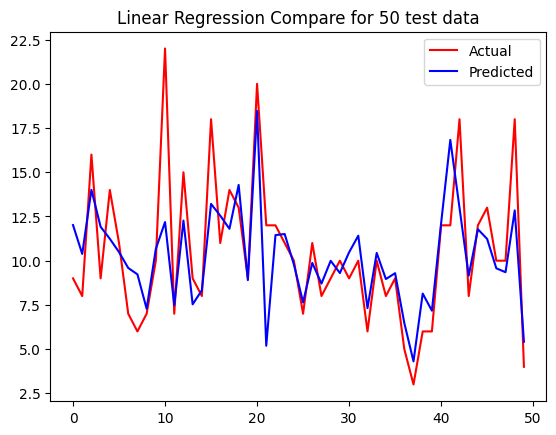

In [105]:
normlize_lr = normlize_linear_regression(X, y)